## **Taller de R**

Elaborado por: Aleidali Macías y Tulio Pérez


CIMAT Monterrey

## **0. Conexión de Colab a Google Drive**



In [9]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

ModuleNotFoundError: No module named 'google'

In [ ]:
!find /content/drive

/content/drive
/content/drive/.shortcut-targets-by-id
/content/drive/My Drive
/content/drive/My Drive/Ord RADIX.gslides
/content/drive/My Drive/Entregable_PF_Aleidali
/content/drive/My Drive/Entregable_PF_Aleidali/Calls.csv
/content/drive/My Drive/Entregable_PF_Aleidali/ProyectoFinal.R
/content/drive/My Drive/Entregable_PF_Aleidali/EQ.png
/content/drive/My Drive/Entregable_PF_Aleidali/Poi.PNG
/content/drive/My Drive/Entregable_PF_Aleidali/Proyecto_Final _Programación_Aleidali.html
/content/drive/My Drive/Entregable_PF_Aleidali/Proyecto_Final _Programación_Aleidali.ipynb
/content/drive/My Drive/Entregable_PF_Aleidali/RexpC.PNG
/content/drive/My Drive/Exposiciones_Inferencia
/content/drive/My Drive/Exposiciones_Inferencia/Box-Cox
/content/drive/My Drive/Exposiciones_Inferencia/Box-Cox/Codigo_Proyecto_Final_Inferencia_BoxCox_Aleidali_Rafael.ipynb
/content/drive/My Drive/Exposiciones_Inferencia/Box-Cox/Código_BoxCox_Clasico.R
/content/drive/My Drive/Exposiciones_Inferencia/Box-Cox/Prese

## **1. ¿Cómo usar R en Google Colab e integrarlo con Python?**

In [ ]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
# Cosas sencillas
%%R
x <- 42
print(x)

[1] 42


In [ ]:
# Modelos 
%%R
#Asigna la ruta de la carpeta donde se estará trabajando.
setwd("/content/drive/My Drive/Taller_MAEC_INEGI_Bases/")
data<-read.csv("Hodkings.csv")


# Modelo lineal generalizado (Regresión Poisson)
m0<-glm(data$ConteoCelulas~data$Enfermedad,family="poisson")
summary(m0)


Call:
glm(formula = data$ConteoCelulas ~ data$Enfermedad, family = "poisson")

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-27.694  -15.206   -4.018    8.935   44.886  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)     6.257763   0.009787   639.4   <2e-16 ***
data$Enfermedad 0.455436   0.012511    36.4   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 11325  on 39  degrees of freedom
Residual deviance:  9965  on 38  degrees of freedom
AIC: 10294

Number of Fisher Scoring iterations: 5



**¿Cómo utilizar en Python los resultados de R?**

In [ ]:
m0 #(directo no lo va a reconocer)

NameError: ignored

In [ ]:
%%R
m0


Call:  glm(formula = data$ConteoCelulas ~ data$Enfermedad, family = "poisson")

Coefficients:
    (Intercept)  data$Enfermedad  
         6.2578           0.4554  

Degrees of Freedom: 39 Total (i.e. Null);  38 Residual
Null Deviance:	    11320 
Residual Deviance: 9965 	AIC: 10290


In [ ]:
# Importa resultados de R a Python 
%R -o m0

In [ ]:
m0

R object with classes: ('glm', 'lm') mapped to:
[FloatSexp..., FloatSexp..., FloatSexp..., FloatSexp..., ..., ListSexpV..., StrSexpVe..., NULLType, ListSexpV...]
  coefficients: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
[6.257763, 0.455436]
  residuals: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
[-0.518950, -0.310010, 0.472303, -0.792274, ..., -0.214635, 0.875299, -0.277847, -0.036491]
  fitted.values: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
[823.200000, 823.200000, 823.200000, 823.200000, ..., 522.050000, 522.050000, 522.050000, 522.050000]
  effects: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
[-1072.158557, -36.404026, 16.475577, -19.806993, ..., -4.281675, 20.621586, -5.725977, -0.211371]
...
R object with classes: ('glm', 'lm') mapped to:
[FloatSexp..., FloatSexp..., FloatSexp..., FloatSexp..., ..., ListSexpV..., StrSexpVe..., NULLType, ListSexpV...]
  qr: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
['glm.fit']
  family: <class 'rpy2.rinterface.NULLType'>
  <rpy2.rinterface.NULLType object at 0x7f5d41f799c8> [RTYPES.NILSXP]
R object with classes: ('glm', 'lm') mapped to:
[FloatSexp..., FloatSexp..., FloatSexp..., FloatSexp..., ..., ListSexpV..., StrSexpVe..., NULLType, ListSexpV...]

In [ ]:
print(m0[1])
print(m0[1][0])

          1           2           3           4           5           6 
-0.51895044 -0.31000972  0.47230321 -0.79227405 -0.32701652  0.34110787 
          7           8           9          10          11          12 
-0.68780369 -0.47157434 -0.64164237 -0.51773567 -0.65014577  0.21963071 
         13          14          15          16          17          18 
-0.47643343 -0.03425656  0.96914480  0.67395530  0.09572400  0.16375121 
         19          20          21          22          23          24 
 0.55855199  1.93367347 -0.28167800 -0.28167800  0.44047505 -0.60157073 
         25          26          27          28          29          30 
-0.71075567 -0.77779906  0.40982664 -0.63221914 -0.39660952  1.39823772 
         31          32          33          34          35          36 
 0.29297960  0.34086773 -0.15716885  0.47687003  0.31788143 -0.18398621 
         37          38          39          40 
-0.21463461  0.87529930 -0.27784695 -0.03649076 

-0.5189504373177846


In [ ]:
# Importa resultados de Python a R 
import numpy as np
data_py = pd.read_csv('/content/drive/My Drive/Taller_MAEC_INEGI_Bases/Hodkings.csv', sep=',')
Stats=data_py.describe()
Stats

ConteoCelulas  Enfermedad
count      40.000000    40.00000
mean      672.625000     0.50000
std       470.487237     0.50637
min       116.000000     0.00000
25%       375.000000     0.00000
50%       528.500000     0.50000
75%       916.000000     1.00000
max      2415.000000     1.00000

In [ ]:
%%R #(no lo va a reconocer)
Stats

NULL


In [ ]:
%R -i Stats

In [ ]:
%%R 
print(Stats)
Stats$Enfermedad

      ConteoCelulas Enfermedad
count       40.0000 40.0000000
mean       672.6250  0.5000000
std        470.4872  0.5063697
min        116.0000  0.0000000
25%        375.0000  0.0000000
50%        528.5000  0.5000000
75%        916.0000  1.0000000
max       2415.0000  1.0000000
[1] 40.0000000  0.5000000  0.5063697  0.0000000  0.0000000  0.5000000  1.0000000
[8]  1.0000000


##**2. Matrices**

In [ ]:
%%R
#Crea matriz
A<- matrix(c(1, 2, 3, 4), nrow=2, ncol=2, byrow=TRUE)
print("Matriz A")
print(A)

#Crea a partir de combinación de vectores
v1<-c(1,2,3,4)
v2<-c(5,6,7,8)
v<-cbind(v1,v2) #ó rbind
print("Matriz v")
print(v)

[1] "Matriz A"
     [,1] [,2]
[1,]    1    2
[2,]    3    4
[1] "Matriz v"
   [,1] [,2] [,3] [,4]
v1    1    2    3    4
v2    5    6    7    8


In [ ]:
%%R
#Suma
print("A+A")
print(A+A)

print("Transpuesta de A")
print(t(A))

print("Dimensión de A")
print(dim(A))

[1] "A+A"
     [,1] [,2]
[1,]    2    4
[2,]    6    8
[1] "Transpuesta de A"
     [,1] [,2]
[1,]    1    3
[2,]    2    4
[1] "Dimensión de A"
[1] 2 2


In [ ]:
%%R
#Multiplicación de matrices
print("Multiplicación A*A")
print(A %*% A)

print("Multiplicación elemento a elemento")
print(A * A)

print("Inversa de A")
print(solve(A))

print("Determinante A")
print(det(A))

[1] "Multiplicación A*A"
     [,1] [,2]
[1,]    7   10
[2,]   15   22
[1] "Multiplicación elemento a elemento"
     [,1] [,2]
[1,]    1    4
[2,]    9   16
[1] "Inversa de A"
     [,1] [,2]
[1,] -2.0  1.0
[2,]  1.5 -0.5
[1] "Determinante A"
[1] -2


In [ ]:
%%R
#Crear una submatriz
C<- matrix(1:12, nrow=3, ncol=4, byrow=TRUE)
print("Matriz C")
print(C)
Csub = C[2:3, 3:4]
print("Sumatriz de C")
print(Csub)


[1] "Matriz C"
     [,1] [,2] [,3] [,4]
[1,]    1    2    3    4
[2,]    5    6    7    8
[3,]    9   10   11   12
[1] "Sumatriz de C"
     [,1] [,2]
[1,]    7    8
[2,]   11   12


In [ ]:
%%R
print("Matriz diagonal")
diagMat = diag(c(2, 2)) # El argumento es un vector
print(diagMat)
diagMat = diag(diag(A)) # Toma los elementos de la diagonal de A
print(diagMat)

print("Convierte de matriz a vector")
print(c(A))

[1] "Matriz diagonal"
     [,1] [,2]
[1,]    2    0
[2,]    0    2
     [,1] [,2]
[1,]    1    0
[2,]    0    4
[1] "Convierte de matriz a vector"
[1] 1 3 2 4


In [ ]:
%%R
Aev<-eigen(A)
print("Eigenvalores de A")
Aeval<-Aev$values
print(Aeval)
print("Eigenvectores de A")
Aevec<-Aev$vectors
print(Aevec)

[1] "Eigenvalores de A"
[1]  5.3722813 -0.3722813
[1] "Eigenvectores de A"
           [,1]       [,2]
[1,] -0.4159736 -0.8245648
[2,] -0.9093767  0.5657675


In [ ]:
%%R
print("DescOmposición SVD")
svdres<-svd(A)
U = svdres$u
print(U)
Q = svdres$d
print(Q)
V = svdres$v
print(V)

[1] "DescOmposición SVD"
           [,1]       [,2]
[1,] -0.4045536 -0.9145143
[2,] -0.9145143  0.4045536
[1] 5.4649857 0.3659662
           [,1]       [,2]
[1,] -0.5760484  0.8174156
[2,] -0.8174156 -0.5760484


## **3. Creación de Funciones**

Nombre_funcion_ <-function(argumentos)
{
  Operaciones
  return
}


In [ ]:
%%R
#Ejemplo
#Esta funcion suma los primero k elementos de un vector x
Ejemplo<-function(x) x^2



Ejemplo_2<-function(x,y)
{
  sum(x)+length(y)
}
#Sample toma una muestra sin remplazo del vector en el primer aargumento, el tamaño lo inidca el segundo argumento 
Ejemplo(sample(c(1,4,5,6,7),3))


[1] 36 25 16


In [ ]:
%%R
formals(Ejemplo)
#environment(Ejemplo)

$x




In [ ]:
%%R
f <- function() {
x <- 1
y <- 2
c(x, y)
}
f()

[1] 1 2


In [ ]:
#ALERTA: si el nombre no es definido dentro de la función R busca el valor un nevel arriba
%%R
x <- 2
g <- function() {
y <- 1
c(x, y)
}
g()
#rm(x,g)

[1] 2 1


In [ ]:
##La misma regla se aplica para funciones creadas dentro de otras funciones
%%R
j <- function(x) {
y <- 2
function() {
c(x, y)
}
}
k <- j(1)
k()
#rm(j, k)

[1] 1 2


In [ ]:
%%R
j <- function() {
#La funcion exists regresa True si esiste una variable con el nombre que recibe como argumento
if (!exists("a")) {
a <- 1
} else {
a <- a + 1
}
print(a)
}
j()
##rm(j)

[1] 1


In [ ]:
%%R
#R busca los valores cuando la función es ejecutada no cuando es creda, 
#por esto el valor que devuelve puede depender de los objetos fuera de su ambiente.
f <- function() x
x <- 15
f()
#x <- 20
#f()  

[1] 15


In [ ]:
%%R
#R nos permite incluso asignar funciones a caracteres reservados para operadores
`(` <- function(e1) 
{
if (is.numeric(e1) && runif(1) < 0.1) {
e1 + 1
} 
else {
e1
}
}
#Replicate ejecuta un comando tantas  veces como el primer argumento indique 
replicate(50, 3*(1+3))
#rm('(')

Entonces cada operador es una función


In [ ]:
%%R
x <- 10; y <- 5
'+'(x,y)

[1] 15


## **4. Funciones estadísticas y matemáticas**



### Funciones matemáticas

* minx = min(x)
* maxx = max(x)
* meanx = mean(x)
* modx = x1 %% x2
* stddevx = sd(x)
* absolutevaluex = abs(x)
* squarerootx = sqrt(x)
* etothex = exp(x)
* xtothey = x^y
* naturallogx = log(x)
* logbase10x = log10(x)
* logbase2x = log2(x)
* logbasearbx = log(x, base=42)

### Otras funciones

* betaxy = beta(x, y)
* gammax = gamma(x)
* factorialn = factorial(n)
* nchooser = choose(n, r)
* npermutation= permutations(n, r)

In [ ]:
#Combinaciones
%%R
# install.packages("gtools")
library(gtools)
combinations(n=3,r=2)

     [,1] [,2]
[1,]    1    2
[2,]    1    3
[3,]    2    3


In [ ]:
#Permutaciones
%%R
permutations(n=3,r=2)

     [,1] [,2]
[1,]    1    2
[2,]    1    3
[3,]    2    1
[4,]    2    3
[5,]    3    1
[6,]    3    2


### Funciones para redondear o truncar 
* nextintx = ceiling(x)
* justintx = floor(x)
* round2dec = round(x, 2)
* roundint = round(x)
* movetozero = trunc(x)

### Funciones estadísticas

In [ ]:
%%R
#Función de densidad
print(dnorm(0,mean=0, sd=1))

#Función de densidad acumulada (acumula por la izquierda)
print(pnorm(1.645, mean=0, sd=1, lower.tail=TRUE))

#Funcion de supervivencia (acumula por la derecha)
print(pnorm(1.645, mean=0, sd=1, lower.tail=FALSE))

# Cuantiles
print(qnorm(0.95, mean=0, sd=1, lower.tail=TRUE))

# Generar número aleatorios de cierta distribución
print(rnorm(10, mean=0, sd=1))

[1] 0.3989423
[1] 0.9500151
[1] 0.04998491
[1] 1.644854
 [1]  0.9369700 -0.7295494  0.7586762  0.4666629 -1.0050498 -0.8088947
 [7] -1.0335674  0.9223811  0.4149369  0.0394831


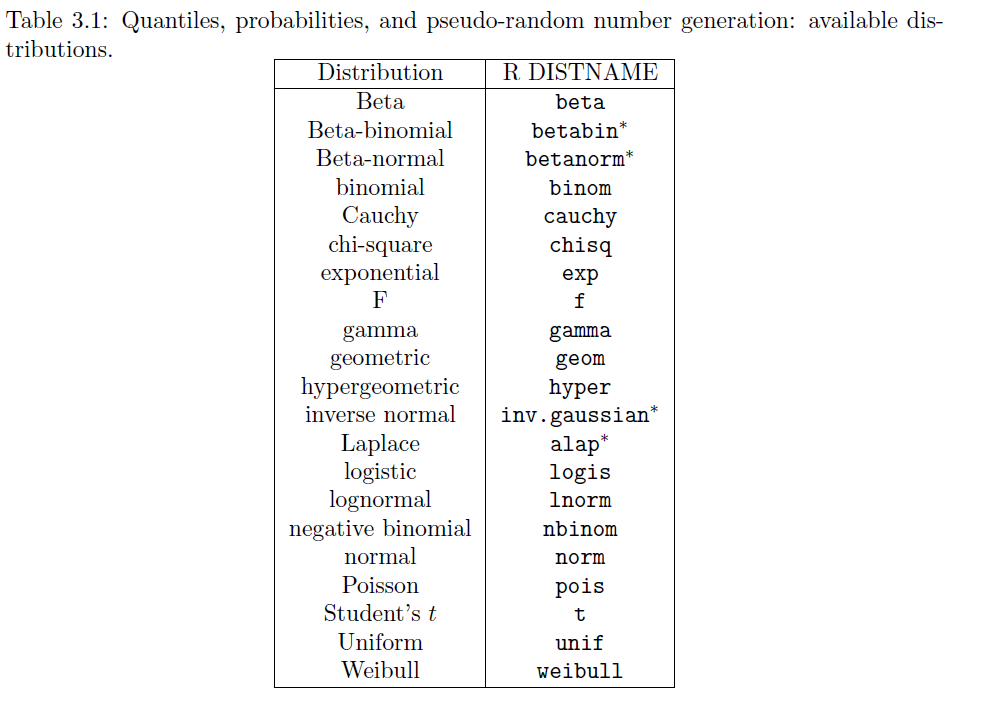




### Multivariate normal random variables

In [ ]:
# Generar vector aleatorio bajo la distribución normal multivariada
%%R

library(MASS)
# Ejemplo Normal Multivariada de 3 variables
# Definimos media
mu = rep(0, 3)
# Definimos matriz de covarianza
Sigma = matrix(c(3, 1, 2, 
                 1, 4, 0, 
                 2, 0, 5), nrow=3)

xvals = mvrnorm(10, mu, Sigma)
print(xvals)

print("Media por columnas")
print(apply(xvals, 2, mean))
print("Media por renglones")
print(apply(xvals, 1, mean))

            [,1]       [,2]       [,3]
 [1,] -2.4430079 -3.3916222 -0.3394722
 [2,]  0.5152472  1.9213725  1.6274349
 [3,]  1.5676281 -1.0449620  0.2930143
 [4,] -2.5789131  0.6362899 -4.5181031
 [5,] -1.7146850 -2.7501493 -0.4955182
 [6,]  0.3954788  0.7738159 -1.1025276
 [7,] -0.3653332  4.9997382 -2.3018854
 [8,] -0.2409029  1.3506563 -1.9388800
 [9,]  0.4467571  0.9064534 -0.5225100
[10,] -0.6417444 -0.4238949 -1.9112051
[1] "Media por columnas"
[1] -0.5059475  0.2977698 -1.1209652
[1] "Media por renglones"
 [1] -2.0580341  1.3546849  0.2718935 -2.1535754 -1.6534508  0.0222557
 [7]  0.7775066 -0.2763755  0.2769001 -0.9922815


### Derivadas

In [ ]:
%%R
# install.packages("mosaic")
library(mosaic)
library(dplyr)
x<-3
D(expression(x^2), "x")

[1] 6


### Estimación por Máxima Verosimilitud


In [ ]:
%%R
# Maximum-likelihood Fitting of Univariate Distributions
library(MASS)
x<-data$ConteoCelulas
fit <- fitdistr(x, "normal")
parametros <- fit$estimate
print(parametros)

    mean       sd 
672.6250 464.5689 


## **5. Lectura y manejo de Bases de Datos**

**Importar datos de excel**


In [ ]:
%%R
#importar un csv, contiene la intensidad de grises en cada pixel (785) de una imagen (19999)
mnist_train<-read.csv('/content/sample_data/mnist_train_small.csv')
dim(mnist_train)


[1] 19999   785


Como importar la siguiete tabla de excel, sin usar excel?

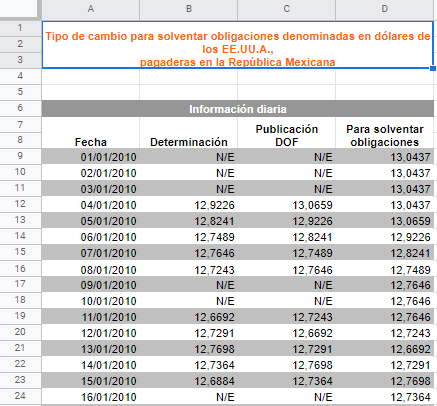

In [ ]:
%%R
#Paqueterias para leeer archivos excel(readxl), y manipulaciones gramaticas de los datos (dplyr)
#install.packages(c("readxl", "dplyr"))
library('readxl')


In [ ]:
%%R
#read_xls lee solo archivos xls
#read_xlsx lee solo archivos xlsx
#read_excel lee los dos tipos de archivo
#guardamos el encabezado
#A los tres tipos de funciones se les pueden dar argumentos, como rango u hoja
encabezado<-read_xls('tipoCambio.xls',sheet='tipoCambio',range='A7:D7',col_names=FALSE)
#para leer los datos a partir de la fila 9 usamos skip para ignorar las 8 anteriores
tipo_de_cambio<-read_xls('tipoCambio.xls',sheet='tipoCambio',skip=8,col_names=FALSE)
#tipo_de_cambio<-read_excel('tipoCambio.xls',sheet='tipoCambio',skip=8,)

#tipo_de_cambio
#str(tipo_de_cambio)
#Convertimos a base de datos
tipo_de_cambio<-as.data.frame(tipo_de_cambio)
#agregamos encabezado
names(tipo_de_cambio)<-encabezado
head(tipo_de_cambio)

R[write to console]: Error: `path` does not exist: ‘tipoCambio.xls’




Error: `path` does not exist: ‘tipoCambio.xls’


In [ ]:
%%R
#La libreria lubridate nos permite trabajar con fechas
#library(lubridate)
tipo_de_cambio = mutate(tipo_de_cambio, datevar = dmy(Fecha))

In [ ]:
%%R
#head(tipo_de_cambio)
tipo_de_cambio[15,]


In [ ]:
%%R
#Graficamos
plot(tipo_de_cambio$datevar,tipo_de_cambio[,4],type='l',xlab='Tiempo',ylab='Precio',lwd=1.5,col='black')


In [ ]:
%%R 
#Crear una variable categorica a partir de variables continuas
new_cat<-cut(tipo_de_cambio[,4], breaks=c(0, 20,21,22,30),
labels=c("valor1", "valor2", "valor3",'valor4'), right=FALSE)
#concatenamos bases de datos
tipo_de_cambio=cbind(tipo_de_cambio,new_cat)
head(tipo_de_cambio)


In [ ]:
%%R
#Podemos extraer subcadenas de cadenas de texto
x<-'Maestría en Análisis, Estadística y Cómputo'
get2through4 = substr(x, start=2, stop=4)
get2through4
#Medir el tamaño de la cadena
len = nchar(x)
len

In [ ]:
%%R
#Filtrar por cadenas
filter(tipo_de_cambio, substr(as.POSIXct(datevar), 1, 4)=="2016" & Determinación=='N/E')

In [ ]:
%%R
#Libreria para crear conexiones a SQL
#install.packages('RSQLite')
library('RSQLite')

In [ ]:
%%R
#Crear conexión
con <- dbConnect(RSQLite::SQLite(), "ontime.sqlite3")
con


<SQLiteConnection>
  Path: /content/ontime.sqlite3
  Extensions: TRUE


**Otro tipo de datos**

library(foreign) #Cargar librería foreign

ds = read.dbf("filename.dbf") # DBase

ds = read.epiinfo("filename.epiinfo") # Epi Info

ds = read.mtp("filename.mtp") # Minitab portable worksheet

ds = read.octave("filename.octave") # Octave

ds = read.ssd("filename.ssd") # SAS version 6

ds = read.xport("filename.xport") # SAS XPORT file

ds = read.spss("filename.sav") # SPSS

ds = read.dta("filename.dta") # Stata

ds = read.systat("filename.sys") # Systat

**Más funciones de dplyr**

**Filter**

**select**

**arrange**

**mutate**

**summarise**

**groupby**


In [ ]:
%%R
#Cargamos la base de datos integrada en R
#Datos de vuelos
#install.packages('nycflights13')
#library(nycflights13)
library(tidyverse)
data("flights")
#####  Vistazo al dataset usando pipes(tidyverse)#########
#flights %>% head(5)
#flights %>% names()
flights %>% str()   
#flights %>% summary() 


tibble [336,776 × 19] (S3: tbl_df/tbl/data.frame)
 $ year          : int [1:336776] 2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 ...
 $ month         : int [1:336776] 1 1 1 1 1 1 1 1 1 1 ...
 $ day           : int [1:336776] 1 1 1 1 1 1 1 1 1 1 ...
 $ dep_time      : int [1:336776] 517 533 542 544 554 554 555 557 557 558 ...
 $ sched_dep_time: int [1:336776] 515 529 540 545 600 558 600 600 600 600 ...
 $ dep_delay     : num [1:336776] 2 4 2 -1 -6 -4 -5 -3 -3 -2 ...
 $ arr_time      : int [1:336776] 830 850 923 1004 812 740 913 709 838 753 ...
 $ sched_arr_time: int [1:336776] 819 830 850 1022 837 728 854 723 846 745 ...
 $ arr_delay     : num [1:336776] 11 20 33 -18 -25 12 19 -14 -8 8 ...
 $ carrier       : chr [1:336776] "UA" "UA" "AA" "B6" ...
 $ flight        : int [1:336776] 1545 1714 1141 725 461 1696 507 5708 79 301 ...
 $ tailnum       : chr [1:336776] "N14228" "N24211" "N619AA" "N804JB" ...
 $ origin        : chr [1:336776] "EWR" "LGA" "JFK" "JFK" ...
 $ dest          : ch

In [ ]:
%%R
# filter función para filtrar 
filter(flights,month==12,day==5)  # Vuelos del 5/12

#filter(flights,dest=='DAY',dep_delay>20) # Destino DAY con retraso mayor a 20

#filter(flights,month==11 | month==12)  # Vuelos noviembre y diciembre

#filter(flights,day %in% c(15:30))  # Segunda quincena de todos los meses


# A tibble: 969 x 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013    12     5       16           2159       137      117           2307
 2  2013    12     5       27           2035       232      143           2203
 3  2013    12     5       31           2229       122      153           2351
 4  2013    12     5       32           1930       302      228           2136
 5  2013    12     5       38           2359        39      505            445
 6  2013    12     5       50           2046       244      233           2224
 7  2013    12     5       56           2359        57      510            437
 8  2013    12     5      155           2130       265      445             18
 9  2013    12     5      457            500        -3      637            651
10  2013    12     5      512            515        -3      753            814
# … with 959 more rows, and 11 

In [ ]:
%%R

arrange(flights,year,month,day)


# A tibble: 336,776 x 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     1     1      517            515         2      830            819
 2  2013     1     1      533            529         4      850            830
 3  2013     1     1      542            540         2      923            850
 4  2013     1     1      544            545        -1     1004           1022
 5  2013     1     1      554            600        -6      812            837
 6  2013     1     1      554            558        -4      740            728
 7  2013     1     1      555            600        -5      913            854
 8  2013     1     1      557            600        -3      709            723
 9  2013     1     1      557            600        -3      838            846
10  2013     1     1      558            600        -2      753            745
# … with 336,766 more rows,

In [ ]:
%%R
#Select + mutate agregamos tres columnas mas a los valores seleccionados
flights %>% 
    select(flight, ends_with('delay'), distance, air_time) %>%
    mutate( profit=dep_delay-arr_delay,
            horas_vuelo=air_time/60 %>% round(0),
            velocidad_media=distance/air_time*60)


# A tibble: 336,776 x 8
   flight dep_delay arr_delay distance air_time profit horas_vuelo
    <int>     <dbl>     <dbl>    <dbl>    <dbl>  <dbl>       <dbl>
 1   1545         2        11     1400      227     -9       3.78 
 2   1714         4        20     1416      227    -16       3.78 
 3   1141         2        33     1089      160    -31       2.67 
 4    725        -1       -18     1576      183     17       3.05 
 5    461        -6       -25      762      116     19       1.93 
 6   1696        -4        12      719      150    -16       2.5  
 7    507        -5        19     1065      158    -24       2.63 
 8   5708        -3       -14      229       53     11       0.883
 9     79        -3        -8      944      140      5       2.33 
10    301        -2         8      733      138    -10       2.3  
# … with 336,766 more rows, and 1 more variable: velocidad_media <dbl>


In [ ]:
%%R

flights %>% summarise(atraso=mean(dep_delay,na.rm=T))
#%>% summarise(atraso=max(dep_delay,na.rm=T))
    

 #Resumen de retraso de partida por fechas
#flights %>%   group_by(year,month,day) %>% summarise(delay=mean(dep_delay,na.rm=T))

# Resumen de retraso de partida por destino

#flights %>%  group_by(dest) %>% summarise(cases=n(),distance= mean(distance, na.rm = T),delay=mean(dep_delay,na.rm=T),)



# A tibble: 1 x 1
  atraso
   <dbl>
1   12.6


## **6. Familia apply**


  

La familia de funciones apply es usada para aplicar una función a cada elemento de una estructura de datos. En particular, es usada para aplicar funciones en matrices, data frames, arrays y listas.

Con esta familia de funciones podemos automatizar tareas complejas usando poca líneas de código y es una de las características distintivas de R como lenguaje de programación.

apply()
eapply()
lapply()
mapply()
rapply()
sapply()
tapply()
vapply()
Podemos evitar usar bucles(for, while)


**apply:**La función apply nos permite aplicar una función a una matriz, lista o vector que se le pase cómo parámetro.

**lapply:** Recibe una lista y devuelve una lista

**sapply:** Recibe una lista y devuelve un vector

**tapply:**Realiza una operación (parámetro 3) respecto a un vector (parámetro 1) agrupada por los factores que se indiquen como argumento (parámetro 2).

**mapply:** Realiza operaciones entre matrices y devuelve una lista o vector


**vapply:** Devuelve un vector con la longitud que tiene cada una de las listas introducidas como parámetro.


**rapply:** apply con naturaleza recursiva





In [ ]:
%%R
mi_matriz <- matrix(1:9,nrow = 3, ncol = 3)
mi_matriz


     [,1] [,2] [,3]
[1,]    1    4    7
[2,]    2    5    8
[3,]    3    6    9


In [ ]:
%%R
apply(mi_matriz,2,sum)


[1]  6 15 24


In [ ]:
%%R
A <- matrix(1:9,nrow = 3, ncol = 3)
B <- matrix(11:19,nrow = 3, ncol = 3)
C <- matrix(21:29,nrow = 3, ncol = 3)
mi_lista <- list(A,B,C)
lapply(mi_lista,sum)

[[1]]
[1] 45

[[2]]
[1] 135

[[3]]
[1] 225



In [ ]:
%%R
sapply(mi_lista,sum)

[1]  45 135 225


In [ ]:
%%R
x<-sample(20)
y<- factor(rep(letters[1:5], each = 4))
tapply(x, y, sum)

#Otro ejemplo


 a  b  c  d  e 
54 65 20 30 41 


In [ ]:
%%R
#Suma el primer elemento de cada vector, después el segundo y así sucesivamente:
mapply(sum, 1:5, 1:5, 1:5) 



[1]  3  6  9 12 15


In [ ]:
%%R
mapply(rep, 1:4, 4:1)

[[1]]
[1] 1 1 1 1

[[2]]
[1] 2 2 2

[[3]]
[1] 3 3

[[4]]
[1] 4



In [ ]:

%%R
mapply(rnorm,1:5,sample(c(1:5)))

[[1]]
[1] 4.25766

[[2]]
[1] 2.371040 2.015774

[[3]]
[1] 1.7674546 0.8844759 0.2681832

[[4]]
[1] 3.831363 6.889719 4.652263 4.210412

[[5]]
[1] 3.669311 1.977331 1.101802 4.368296 2.671211



In [ ]:
%%R 
x <- list(A = 1, B = 1:3, C = 1:7)
vapply(x, FUN = sum, FUN.VALUE = 0)
vapply(x, FUN = length, FUN.VALUE = 0L)


UsageError: Cell magic `%%R` not found.


In [ ]:
%%R
x=list(1,2,3,4)
rapply(x,function(x){x^2},class=c("numeric"))
x=list(1,list(2,3),4,list(5,list(6,7)))
y<-rapply(x,function(x){x^2},class=c("numeric"),how="list")
str(y)

List of 4
 $ : num 1
 $ :List of 2
  ..$ : num 4
  ..$ : num 9
 $ : num 16
 $ :List of 2
  ..$ : num 25
  ..$ :List of 2
  .. ..$ : num 36
  .. ..$ : num 49


In [ ]:
%%R
x<-list(1,list(2),"f")
a<-rapply(x,function(x){x^2},class=c("numeric"),how="list",deflt="d")
a

[[1]]
[1] 1

[[2]]
[[2]][[1]]
[1] 4


[[3]]
[1] "d"



## **7. Visualización**

In [ ]:
%%R
#Base Hodkings
setwd("/content/drive/My Drive/Taller_MAEC_INEGI_Bases/")
data<-read.csv("Hodkings.csv")
#Filtro Base
data_Enf<-filter(data,Enfermedad==1)
data_NoEnf<-filter(data,Enfermedad==0)

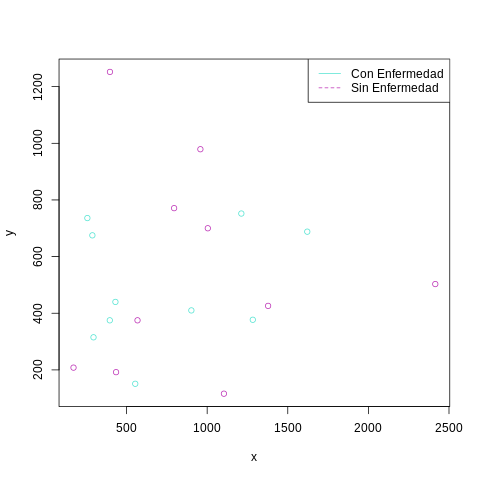

In [ ]:
#Scatterplot
%%R
x<-data_Enf$ConteoCelulas
y<-data_NoEnf$ConteoCelulas
plot(x,y,col=c("#50E3D1","#BB2CB4"))
legend("topright", legend=c( "Con Enfermedad","Sin Enfermedad"),lty=1:2,col=c("#50E3D1","#BB2CB4"))

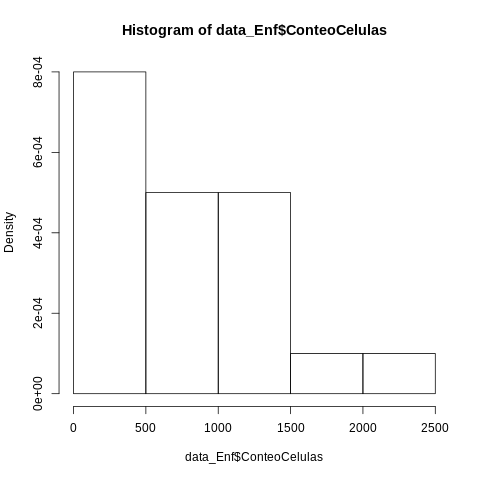

In [ ]:
#Histograma
%%R
hist(data_Enf$ConteoCelulas,prob=TRUE)

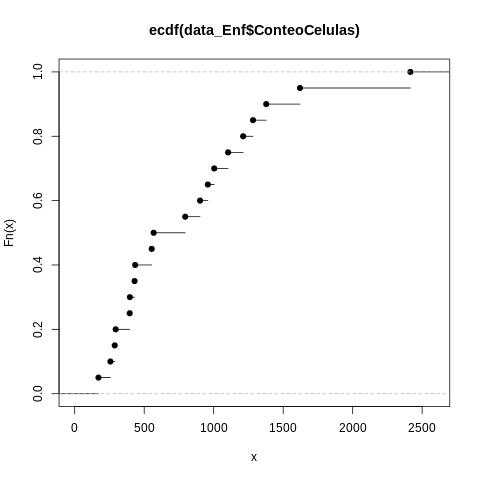

In [ ]:
%%R
# Función de distribución acumulada
plot(ecdf(data_Enf$ConteoCelulas))

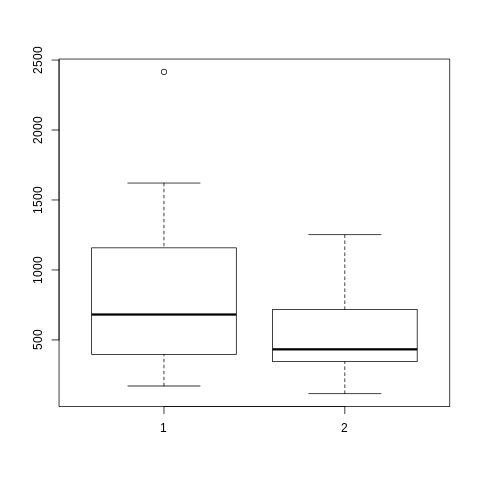

In [ ]:
%%R
boxplot(data_Enf$ConteoCelulas,data_NoEnf$ConteoCelulas)

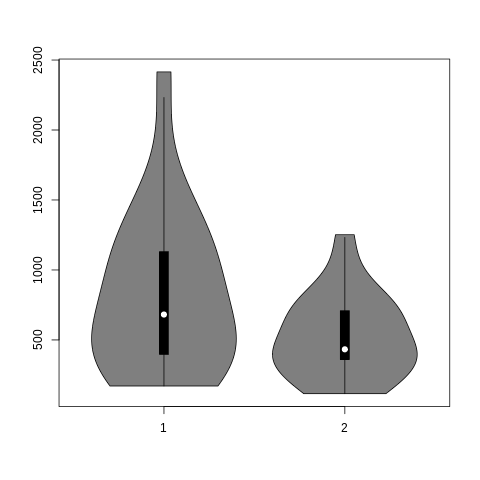

In [ ]:
# Gráfico de violin
%%R
# install.packages("vioplot")
library(vioplot)
vioplot(data_Enf$ConteoCelulas,data_NoEnf$ConteoCelulas)

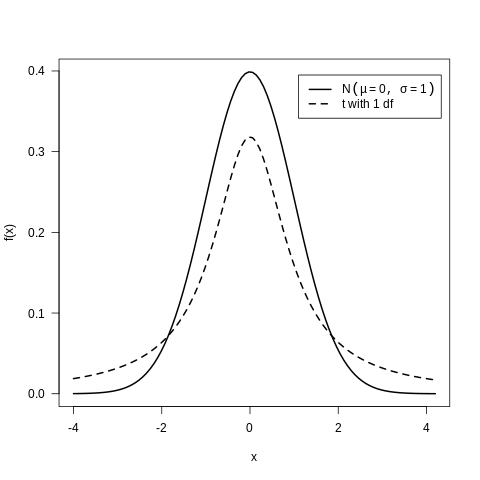

In [ ]:
%%R
#Genera la densidad de la distribución Normal(0,1)
x = seq(from=-4, to=4.2, length=100)
normval = dnorm(x, 0, 1)
#Genera la densidad de la distribución t-student(1 gl)
dfval = 1
tval = dt(x, df=dfval)
# Grafica
plot(x, normval, type="n", ylab="f(x)", las=1)
lines(x, normval, lty=1, lwd=2)
lines(x, tval, lty=2, lwd=2)
legend(1.1, .395, lty=1:2, lwd=2,
legend=c(expression(N(mu == 0,sigma == 1)),
paste("t with ", dfval," df", sep="")))

In [ ]:
#Correlación
%%R
print(cor(data$ConteoCelulas,data$Enfermedad))

[1] 0.3241177


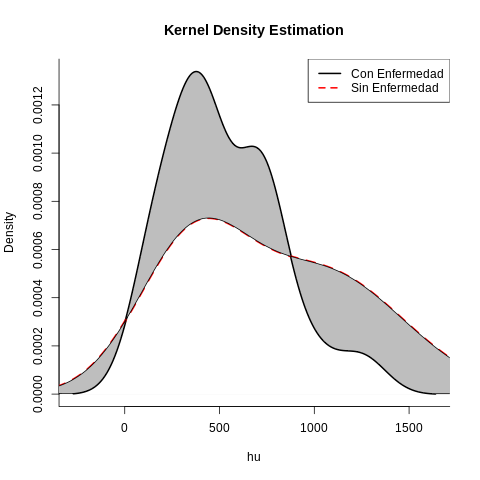

In [ ]:
%%R
#Kernel Density Estimation

#Estimación
densx<-density(data_Enf$ConteoCelulas)
densy<-density(data_NoEnf$ConteoCelulas)

#Graficamos
plot(densy, main="Kernel Density Estimation", lwd=3, xlab="hu", bty="l")
lines(densx, lty=2, col=2, lwd=3)
legend("topright", legend=c( "Con Enfermedad","Sin Enfermedad"), col=1:2, lty=1:2, lwd=2)
xvals = c(densx$x, rev(densy$x))
yvals = c(densx$y, rev(densy$y))
polygon(xvals, yvals, col="gray") #Rellena el área entre densidades

In [ ]:
# Lectura base Excel
%%R
# install.packages("readxl")
library("readxl")
data_xls = read_excel("datoscontaminacion.xls",col_names=TRUE)
# Drop the columns of the dataframe
data_xls = data.frame(select(data_xls,-c(1)))
data_xls

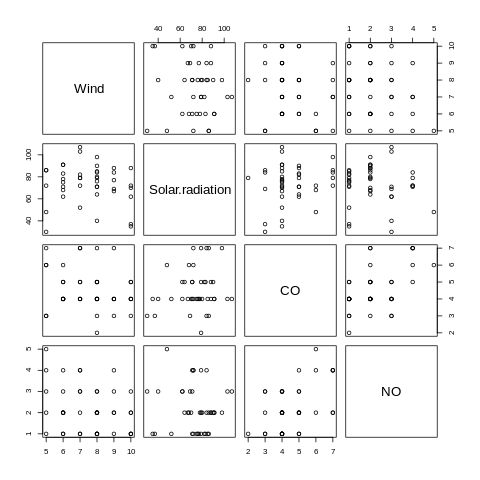

In [ ]:
%%R
#PAIRPLOT
pairs(data_xls[1:4])

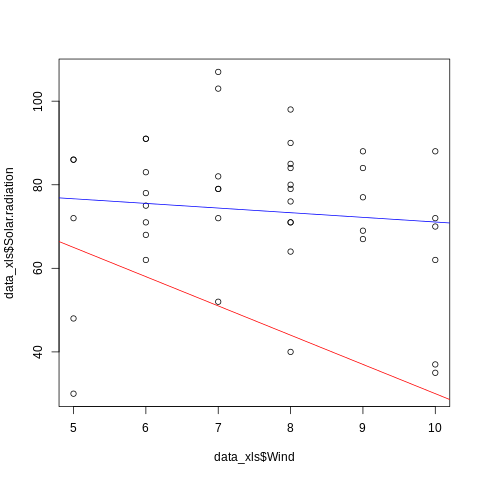

In [ ]:
%%R
plot(data_xls$Wind, data_xls$Solar.radiation)
abline(lm(data_xls$Solar.radiation ~ data_xls$Wind),col="blue")
intercept=100
slope=-7
abline(intercept, slope,col="red")

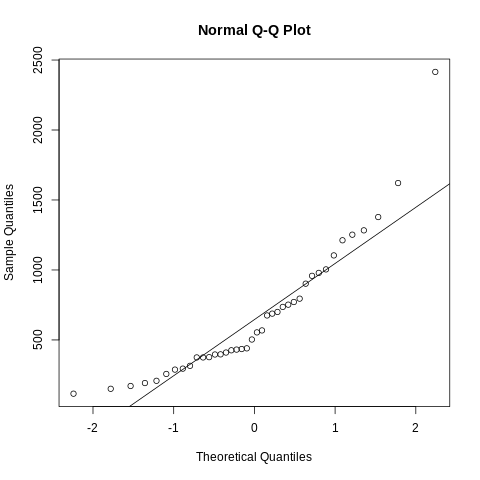

In [ ]:
%%R
qqnorm(data$ConteoCelulas)
qqline(data$ConteoCelulas)

    mean       sd 
672.6250 464.5689 


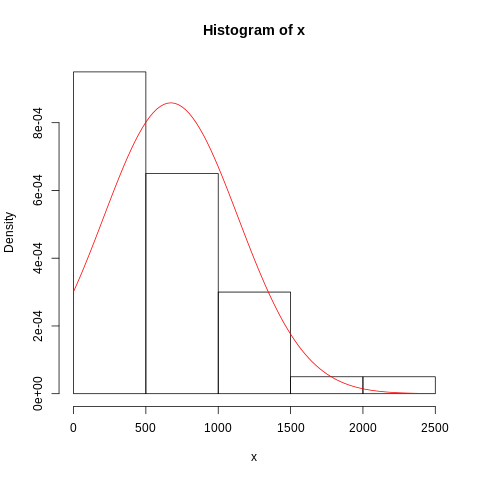

In [ ]:
%%R
# Maximum-likelihood Fitting of Univariate Distributions
library(MASS)
x<-data$ConteoCelulas
fit <- fitdistr(x, "normal")
parametros <- fit$estimate
print(parametros)
hist(x, prob = TRUE)
curve(dnorm(x, parametros[1], parametros[2]), col = 2, add = TRUE)

       rate 
0.001486713 


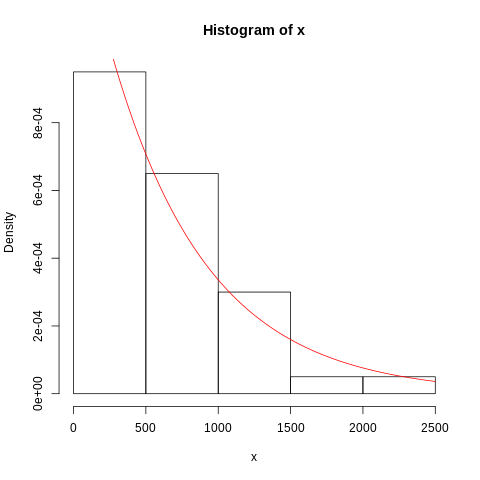

In [ ]:
%%R
# Maximum-likelihood Fitting of Univariate Distributions
library(MASS)
x<-data$ConteoCelulas
fit <- fitdistr(x, "exponential")
parametros <- fit$estimate
print(parametros)
hist(x, prob = TRUE)
curve(dexp(x, parametros), col = "red", add = TRUE)

R[write to console]: Loading required package: survival



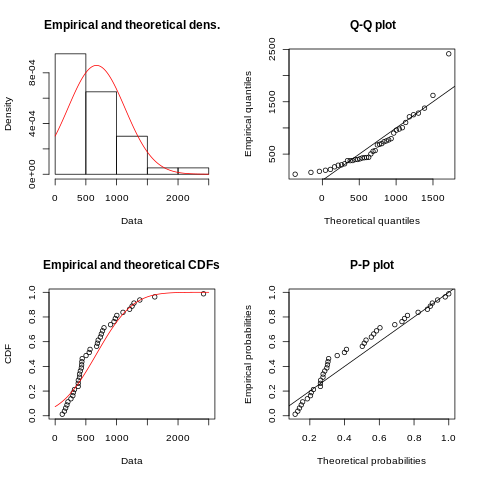

In [ ]:
%%R
# install.packages("fitdistrplus")
library(fitdistrplus)
FIT <- fitdist(x, "norm")    ## note: it is "norm" not "normal"
plot(FIT)

## **8. Problemas de Optimización**

In [ ]:
# 1-dimensional optimzation
%%R
f = function(x) {
  return(x*(10-x)) 
  }
optimize(f, interval=c(0, 10), maximum=TRUE)

$maximum
[1] 5

$objective
[1] 25



In [ ]:
# n-dimensional optimzation
%%R
f<- function(x) 2*(x[1]-1)^2 + 5*(x[2]-3)^2 + 10
r <- optim(c(1, 1), f)
r
# par = mejor estimación de los valores óptimos
# x[1], x[2]= son las variables
# value= valor de la función optimizada

$par
[1] 1.000168 3.000232

$value
[1] 10

$counts
function gradient 
      75       NA 

$convergence
[1] 0

$message
NULL

